In [96]:
import pandas as pd
import numpy as np
import sklearn as skl
import matplotlib as plt

In [97]:
df= pd.read_csv("/content/Balaji Fast Food Sales.csv")
df.head()

,order_id,date,item_name,item_type,item_price,quantity,transaction_amount,transaction_type,received_by,time_of_sale
0,1,07-03-2022,Aalopuri,Fastfood,20,13,260,NaN,Mr.,Night
1,2,8/23/2022,Vadapav,Fastfood,20,15,300,Cash,Mr.,Afternoon
2,3,11/20/2022,Vadapav,Fastfood,20,1,20,Cash,Mr.,Afternoon
3,4,02-03-2023,Sugarcane juice,Beverages,25,6,150,Online,Mr.,Night
4,5,10-02-2022,Sugarcane juice,Beverages,25,8,200,Online,Mr.,Evening


In [98]:
df.info()
df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   order_id            1000 non-null   int64 
 1   date                1000 non-null   object
 2   item_name           1000 non-null   object
 3   item_type           1000 non-null   object
 4   item_price          1000 non-null   int64 
 5   quantity            1000 non-null   int64 
 6   transaction_amount  1000 non-null   int64 
 7   transaction_type    893 non-null    object
 8   received_by         1000 non-null   object
 9   time_of_sale        1000 non-null   object
dtypes: int64(4), object(6)
memory usage: 78.2+ KB


,order_id,item_price,quantity,transaction_amount
count,1000.000000,1000.000000,1000.000000,1000.000000
mean,500.500000,33.315000,8.162000,275.230000
std,288.819436,14.921744,4.413075,204.402979
min,1.000000,20.000000,1.000000,20.000000
25%,250.750000,20.000000,4.000000,120.000000
50%,500.500000,25.000000,8.000000,240.000000
75%,750.250000,50.000000,12.000000,360.000000
max,1000.000000,60.000000,15.000000,900.000000


In [99]:
df.isnull().sum()

order_id                0
date                    0
item_name               0
item_type               0
item_price              0
quantity                0
transaction_amount      0
transaction_type      107
received_by             0
time_of_sale            0
dtype: int64

In [100]:
df=df.dropna()

In [101]:
df['date']= pd.to_datetime(df['date'],format='mixed')

<ipython-input-101-d0cdbb2e0a36>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['date']= pd.to_datetime(df['date'],format='mixed')


In [102]:
df=df.drop(['date','order_id','item_price','transaction_amount','item_type'],axis=1)

In [103]:
df.head()

,item_name,quantity,transaction_type,received_by,time_of_sale
1,Vadapav,15,Cash,Mr.,Afternoon
2,Vadapav,1,Cash,Mr.,Afternoon
3,Sugarcane juice,6,Online,Mr.,Night
4,Sugarcane juice,8,Online,Mr.,Evening
5,Vadapav,10,Cash,Mr.,Evening


In [104]:
df['item_name'].unique()

array(['Vadapav', 'Sugarcane juice', 'Panipuri', 'Frankie', 'Aalopuri',
       'Cold coffee', 'Sandwich'], dtype=object)

In [105]:
df.columns

Index(['item_name', 'quantity', 'transaction_type', 'received_by',
       'time_of_sale'],
      dtype='object')

In [111]:
from yellowbrick.cluster import KElbowVisualizer
from sklearn.cluster import KMeans

In [112]:
Elbow_M = KElbowVisualizer(KMeans(), k=10)

In [113]:
s = (df.dtypes == 'object')
object_cols = list(s[s].index)

In [114]:
from sklearn.preprocessing import LabelEncoder
LE=LabelEncoder()
for i in object_cols:
    df[i]=df[[i]].apply(LE.fit_transform)

print("All features are now numerical")

All features are now numerical


In [115]:
ds=df.copy()

In [116]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(ds)
scaled_ds = pd.DataFrame(scaler.transform(ds),columns= ds.columns )
print("All features are now scaled")

All features are now scaled


In [117]:
scaled_ds.head()

,item_name,quantity,transaction_type,received_by,time_of_sale
0,1.519891,1.572355,-0.935976,-0.972386,-1.395033
1,1.519891,-1.618293,-0.935976,-0.972386,-1.395033
2,1.014769,-0.478776,1.068404,-0.972386,1.418664
3,1.014769,-0.022969,1.068404,-0.972386,-0.691609
4,1.519891,0.432838,-0.935976,-0.972386,-0.691609


In [118]:
from sklearn.decomposition import PCA

In [119]:
pca = PCA(n_components=3)
pca.fit(scaled_ds)
PCA_ds = pd.DataFrame(pca.transform(scaled_ds), columns=(["col1","col2", "col3"]))
PCA_ds.describe().T

,count,mean,std,min,25%,50%,75%,max
col1,893.0,-4.774083e-17,1.042003,-2.572575,-0.782067,0.017649,0.751610,2.683236
col2,893.0,-1.491901e-17,1.028682,-2.501117,-0.737064,0.011704,0.722695,2.580224
col3,893.0,-2.088661e-17,0.996870,-2.480914,-0.686061,0.008950,0.708773,2.548252


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

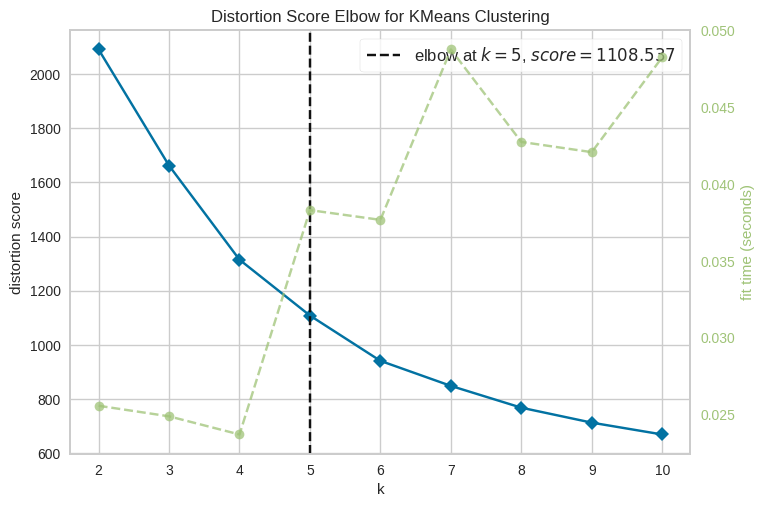

<Axes: title={'center': 'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [120]:
Elbow_M.fit(PCA_ds)
Elbow_M.show()

In [125]:
kmeans = KMeans(n_clusters=5).fit(PCA_ds)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


In [126]:
label =kmeans.fit_predict(PCA_ds)
print (label)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


[0 0 1 4 0 0 2 3 4 4 3 4 4 1 3 3 3 2 2 0 4 0 4 0 4 4 4 1 1 2 1 0 4 2 1 4 1
 1 3 2 3 0 0 1 3 1 3 2 1 2 3 1 3 0 1 3 0 1 2 2 3 2 0 1 4 0 1 4 0 3 3 1 0 1
 4 2 1 2 2 2 2 2 2 1 1 2 4 0 3 2 1 2 3 3 4 4 1 3 0 0 4 0 4 4 0 3 0 4 3 1 0
 3 3 2 3 4 1 4 2 2 1 2 3 3 2 4 0 4 0 1 4 3 3 3 2 1 4 2 0 2 1 4 0 3 1 3 0 3
 1 1 4 0 3 1 1 4 1 4 3 2 4 2 2 0 4 3 4 1 3 3 0 3 2 1 1 2 0 3 3 2 1 2 2 2 1
 0 3 2 1 2 0 4 3 2 0 3 4 4 1 4 3 2 0 3 3 0 4 3 0 1 3 1 3 0 1 4 3 0 0 1 3 0
 4 1 3 0 2 0 1 3 2 0 0 1 2 2 2 0 2 1 3 1 3 3 2 2 1 3 1 3 1 4 0 3 4 3 4 0 2
 2 3 2 1 0 0 4 0 1 4 1 4 4 4 1 0 3 3 2 2 1 0 2 4 4 4 3 3 2 1 0 3 3 4 0 2 1
 2 3 3 3 1 1 1 3 2 4 3 4 2 1 1 3 4 1 2 4 2 4 3 3 2 0 2 4 3 4 4 1 1 4 0 4 3
 0 3 1 2 3 3 3 2 4 4 3 2 3 2 1 3 2 4 0 4 1 2 0 1 0 0 1 1 4 4 1 3 0 2 4 4 1
 1 4 4 1 2 3 2 1 4 0 1 1 3 1 2 4 3 0 4 3 4 4 4 2 2 3 2 2 0 3 4 0 0 0 2 0 1
 3 3 3 3 1 2 3 3 3 0 0 4 3 4 1 3 3 2 1 2 3 0 4 1 1 1 0 4 4 3 3 2 2 0 2 2 1
 3 0 0 3 3 1 1 3 0 1 2 1 2 3 0 2 0 3 3 3 3 2 1 3 4 3 0 4 4 0 2 0 2 1 1 1 2
 0 4 2 0 3 0 3 3 3 3 4 1 

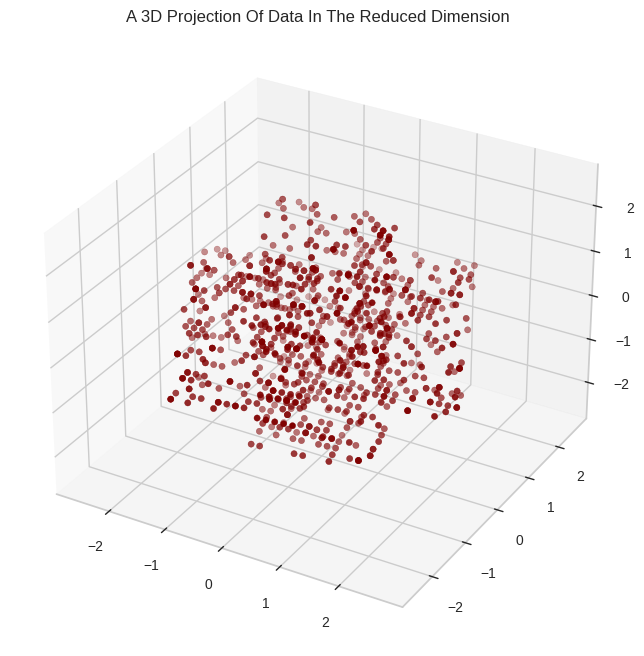

In [129]:
import matplotlib.pyplot as plt
x =PCA_ds["col1"]
y =PCA_ds["col2"]
z =PCA_ds["col3"]
#To plot
fig = plt.figure(figsize=(10,8))
ax = fig.add_subplot(111, projection="3d")
ax.scatter(x,y,z, c="maroon", marker="o" )
ax.set_title("A 3D Projection Of Data In The Reduced Dimension")
plt.show()

In [130]:
from sklearn.cluster import DBSCAN

In [170]:
dbs= DBSCAN(eps=.4, min_samples=5)
dbs.fit(PCA_ds)
labels=dbs.labels_
print(labels)

[ 0  5  1 -1  2  2  1 -1 28  1 -1  1  1  1 -1 -1  7 -1 -1  3 -1  4 26  5
  1  1  4 -1 -1  6  1 -1 -1  1  7 -1 -1 -1  8  3  1  2  4 -1  9 12 10 11
 12  1 10 12 -1  1 -1 -1  5 -1  1  1 -1 13 -1  1  4 34 14  1 -1 10 15  1
  3  7 14 23 -1  1  1  3 -1  1 11 16  1 -1  1 17 -1  1 -1 -1  8  8  4 28
 -1 10  1  4 -1 19 14 -1 -1 18  4 -1  9  7 -1 -1  1  1 -1 -1 -1 -1 -1  1
  7 -1 -1  8  1  3  3 -1 11 12 -1 18  8 -1 23 16 -1  1 19 13 16  4 20  8
 12 21  1 10 -1 -1 33  1 21 12 12 -1  7 27 -1  1 28 -1 -1  4 33 -1  1 -1
 35 30 17 10  1 -1 -1  1  4 21  1  1 14 22  1  1 12  3  1  1 -1  1  5 -1
 -1  1  0  8  1  1  1 28 -1  1 20  1 10 25 33 -1  5 16 21 21 -1 -1 16 -1
 21 -1  4 16 10 -1  1 -1 10 17  1 -1  7  1 22 19 19  7 23  1  1 -1 22  7
 -1  1 -1 21  1  1 -1 12  7 21 12  1 34  1  3  1 -1  4  1 -1 -1  1 12  2
  3  3  5  7 27 12  1  1  1 -1 11  1  1  1  1  7  2 -1 -1  1 24  1  1  1
 -1 25  1  8 -1  5 -1  7  1  1 21  8 12  7  7 21 13 -1 -1  1  1 -1 16  1
 -1 -1  1  1  1 26 -1 10 27 32 23 26 -1  1  1  7 12

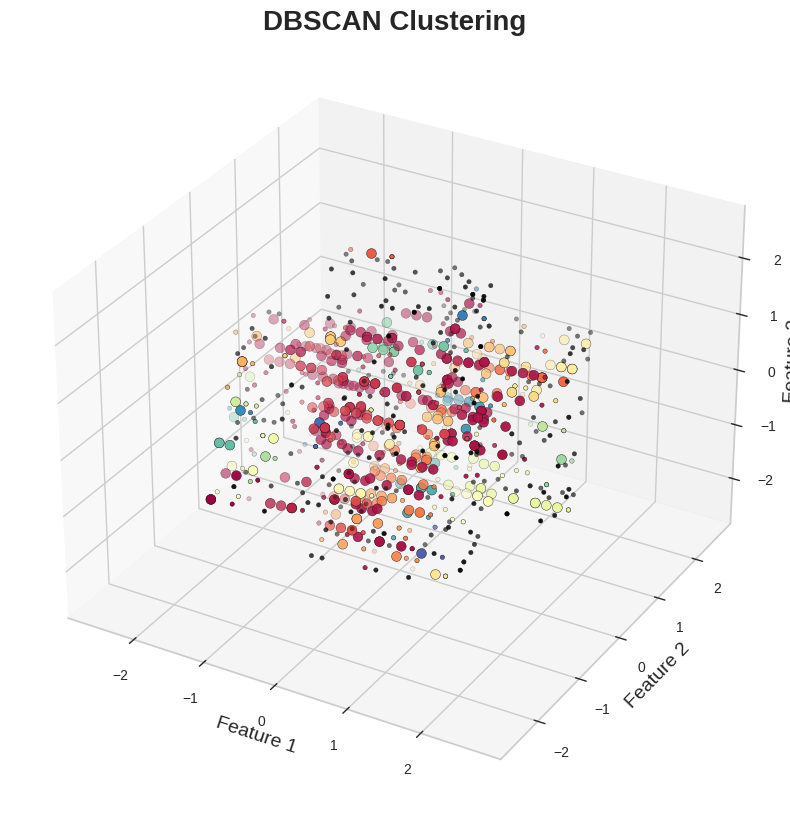

In [175]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

labels = dbs.labels_
core_samples_mask = np.zeros_like(dbs.labels_, dtype=bool)
core_samples_mask[dbs.core_sample_indices_] = True

unique_labels = set(labels)
colors = [plt.cm.Spectral(each) for each in np.linspace(0, 1, len(unique_labels))]

fig = plt.figure(figsize=(15, 10))
ax = fig.add_subplot(111, projection='3d')

for k, col in zip(unique_labels, colors):
    if k == -1:
        # Black used for noise.
        col = [0, 0, 0, 1]

    class_member_mask = (labels == k)

    xy = PCA_ds[class_member_mask & core_samples_mask]
    ax.scatter(xy.iloc[:, 0], xy.iloc[:, 1], xy.iloc[:, 2], c=[col], edgecolor='k', s=50)

    xy = PCA_ds[class_member_mask & ~core_samples_mask]
    ax.scatter(xy.iloc[:, 0], xy.iloc[:, 1], xy.iloc[:, 2], c=[col], edgecolor='k', s=10)

ax.set_title('DBSCAN Clustering', fontweight='bold', fontsize=20)
ax.set_xlabel('Feature 1', fontsize=14)  # Replace with actual feature name
ax.set_ylabel('Feature 2', fontsize=14)  # Replace with actual feature name
ax.set_zlabel('Feature 3', fontsize=14)  # Replace with actual feature name

plt.show()